In [4]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Loading Dataset : 

def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        f.read(16)  # Skip the header
        data = np.fromfile(f, dtype=np.uint8).reshape(-1, 28, 28)
    return data

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        f.read(8)  # Skip the header
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# File path 
train_images_path = 'train-images.idx3-ubyte'
train_labels_path = 'train-labels.idx1-ubyte'
test_images_path = 't10k-images.idx3-ubyte'
test_labels_path = 't10k-labels.idx1-ubyte'


x_train = load_mnist_images(train_images_path)
y_train = load_mnist_labels(train_labels_path)
x_test = load_mnist_images(test_images_path)
y_test = load_mnist_labels(test_labels_path)

# Normalization 
x_train = x_train / 255.0
x_test = x_test / 255.0


print(f'Training data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')



Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [6]:
#  1000 sample for training and 1000 sample for test : 

x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=1000, stratify=y_train)
x_test, _, y_test, _ = train_test_split(x_test, y_test, train_size=1000, stratify=y_test)


In [7]:
# first model 
model_a = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(15, activation='relu'),
    Dense(10, activation='softmax')
])

# second model 
model_b = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(15, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='softmax')
])

# third model 
model_c = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])


# compiling models 
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

compile_model(model_a)
compile_model(model_b)
compile_model(model_c)


# Training models : 

print( "Trainig model a : ")
history_a = model_a.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
print( "Trainig model b : ")
history_b = model_b.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
print( "Trainig model c : ")
history_c = model_c.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))




Trainig model a : 
Epoch 1/20


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1893 - loss: 2.2524 - val_accuracy: 0.4320 - val_loss: 1.8734
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4499 - loss: 1.7789 - val_accuracy: 0.6180 - val_loss: 1.4652
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - loss: 1.3577 - val_accuracy: 0.7820 - val_loss: 1.0933
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8345 - loss: 0.9789 - val_accuracy: 0.8160 - val_loss: 0.8451
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8625 - loss: 0.7715 - val_accuracy: 0.8320 - val_loss: 0.6905
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8830 - loss: 0.6468 - val_accuracy: 0.8460 - val_loss: 0.6071
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9127 - loss: 0.4896 - val_accuracy: 0.8560 - val_loss: 0.5457
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9037 - loss: 0.4687 - val_accuracy: 0.8540 - val_loss: 0.5052
Epo

In [8]:
# evaluation models : 

train_loss_a, train_accuracy_a = model_a.evaluate(x_train, y_train, verbose=0)
test_loss_a, test_accuracy_a = model_a.evaluate(x_test, y_test, verbose=0)
print(f'Model A - Training Accuracy: {train_accuracy_a:.4f}, Test Accuracy: {test_accuracy_a:.4f}')

train_loss_b, train_accuracy_b = model_b.evaluate(x_train, y_train, verbose=0)
test_loss_b, test_accuracy_b = model_b.evaluate(x_test, y_test, verbose=0)
print(f'Model B - Training Accuracy: {train_accuracy_b:.4f}, Test Accuracy: {test_accuracy_b:.4f}')

train_loss_c, train_accuracy_c = model_c.evaluate(x_train, y_train, verbose=0)
test_loss_c, test_accuracy_c = model_c.evaluate(x_test, y_test, verbose=0)
print(f'Model C - Training Accuracy: {train_accuracy_c:.4f}, Test Accuracy: {test_accuracy_c:.4f}')


Model A - Training Accuracy: 0.9760, Test Accuracy: 0.8720
Model B - Training Accuracy: 0.9830, Test Accuracy: 0.8720
Model C - Training Accuracy: 0.9990, Test Accuracy: 0.8860


In [9]:
#  model setting and hyperparameters : 
settings = {
    'Model': ['Model A', 'Model B', 'Model C'],
    'Learning Rate': [0.001, 0.001, 0.001],
    'Epochs': [20, 20, 20],
    'Optimizer': ['Adam', 'Adam', 'Adam'],
    'Hidden Layers': [1, 2, 2],
    'Neurons per Layer': [15, 15, 30]
}

df = pd.DataFrame(settings)
print(df)


     Model  Learning Rate  Epochs Optimizer  Hidden Layers  Neurons per Layer
0  Model A          0.001      20      Adam              1                 15
1  Model B          0.001      20      Adam              2                 15
2  Model C          0.001      20      Adam              2                 30


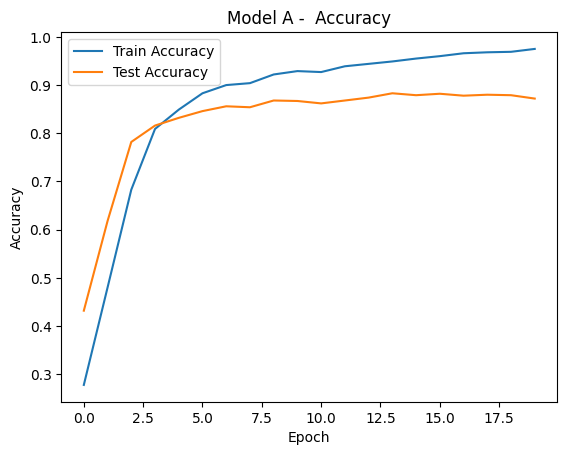

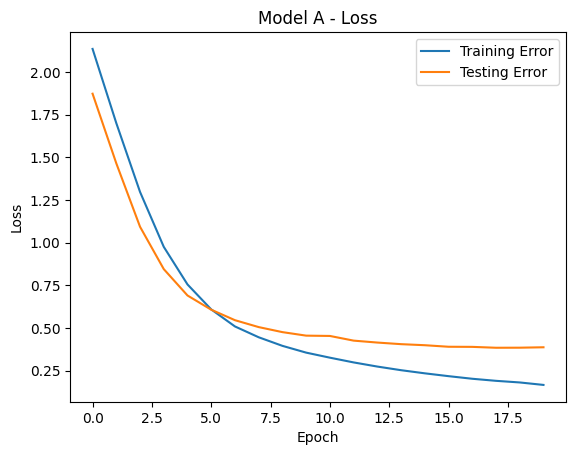

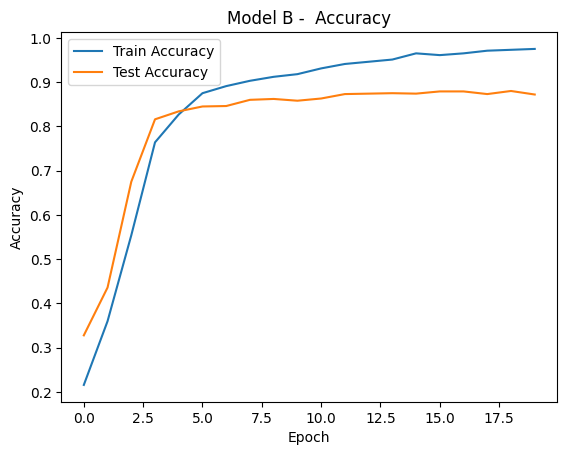

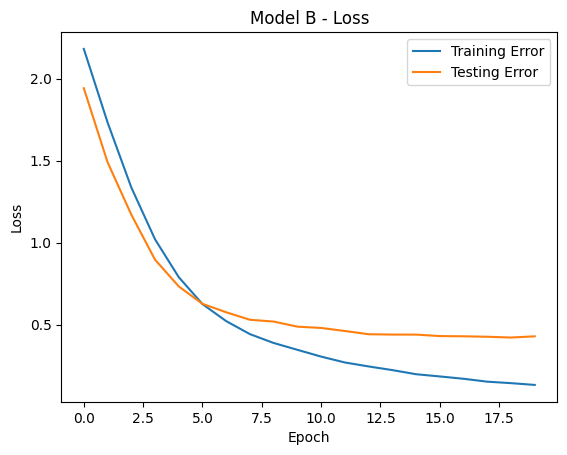

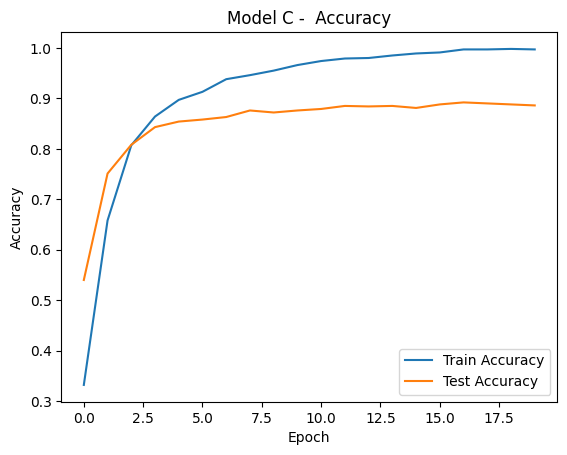

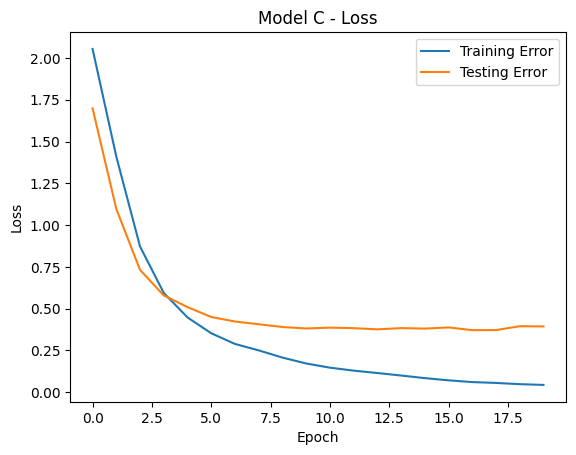

In [10]:


def plot_history(history, model_name):
 
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} -  Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


    plt.plot(history.history['loss'], label='Training Error')
    plt.plot(history.history['val_loss'], label='Testing Error')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history_a, "Model A")
plot_history(history_b, "Model B")
plot_history(history_c, "Model C")


In [11]:


def evaluate_model(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

#Confution matrix 
    cm = confusion_matrix(y_test, y_pred_classes)
    print(f'{model_name} -  CONFUSION MATRIX :\n', cm)

# Report 
    report = classification_report(y_test, y_pred_classes)
    print(f'{model_name} - REPORT \n', report)


evaluate_model(model_a, x_test, y_test, "Model A")
evaluate_model(model_b, x_test, y_test, "Model B")
evaluate_model(model_c, x_test, y_test, "Model C")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model A -  CONFUSION MATRIX :
 [[ 94   0   1   0   0   1   1   0   0   1]
 [  0 109   0   1   0   0   0   0   4   0]
 [  2   3  84   3   5   2   1   1   2   0]
 [  0   0   2  89   0   4   1   1   2   2]
 [  0   1   0   0  78   0   3   0   0  16]
 [  0   1   0   1   3  68   0   3   7   6]
 [  2   0   2   0   1   3  88   0   0   0]
 [  0   0   3   2   0   0   0  94   0   4]
 [  1   3   1   5   1   5   0   2  77   2]
 [  0   2   1   3   2   0   0   2   0  91]]
Model A - REPORT 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        98
           1       0.92      0.96      0.94       114
           2       0.89      0.82      0.85       103
           3       0.86      0.88      0.87       101
           4       0.87      0.80      0.83        98
           5       0.82      0.76      0.79        89
           6       0.94      0.92      0.93        96
           7       0.91      0.91      0.91    